# Total intensity results

This notebook replicates the results for the total intensity case presented in the ForSE paper:
https://arxiv.org/pdf/2011.02221.pdf

In [16]:
from forse.networks.dcgan import *
import matplotlib.pyplot as plt
from forse.tools import *

#### Path to directories with data and NN weights 
the path below is the one for NERSC repos

In [17]:
dir_data = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/'
dir_models = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/weights/'

#### load generator weights

In [18]:
dcgan = DCGAN(output_directory='./', img_size=(320, 320))
dcgan.generator = load_model(dir_models+'forse_generator_T.h5')

/global/homes/k/krach/usr/python_prefix_3.7/lib/python3.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


#### load patches and generate small scales
In the file *GNILC_Thr12_Tlr80_350patches_20x20deg_Npix320_mask8.npy* the first column has the total intensity patches at high resolution (ratio between 12amin and 80amin maps, see paper), the second contains the low resolution patches.

All the patches are normalized in the range [-1, 1]

In [19]:
patch_file = 'GNILC_Thr12_Tlr80_350patches_20x20deg_Npix320_mask8.npy'
Ss_ratio,Ls = np.load(dir_data+patch_file)
npatches = len(Ls)
Ss_ratio_scaled = np.copy(Ss_ratio)
Ls_scaled = np.copy(Ls)
Ss_ratio_edges = []
for i in range(0, npatches):
    Ss_ratio_scaled[i], Ymin, Ymax = rescale_min_max(Ss_ratio[i], return_min_max=True)
    Ls_scaled[i], Xmin, Xmax = rescale_min_max(Ls[i], return_min_max=True)
    Ss_ratio_edges.append([Ymin, Ymax])
Ls_scaled = Ls_scaled.reshape((npatches, 320, 320, 1))
Ss_ratio_scaled = Ss_ratio_scaled.reshape((npatches, 320, 320, 1))

In [20]:
NNout = dcgan.generator.predict(Ls_scaled)

#### Plot generated small scales 
figure 3 in ForSE paper

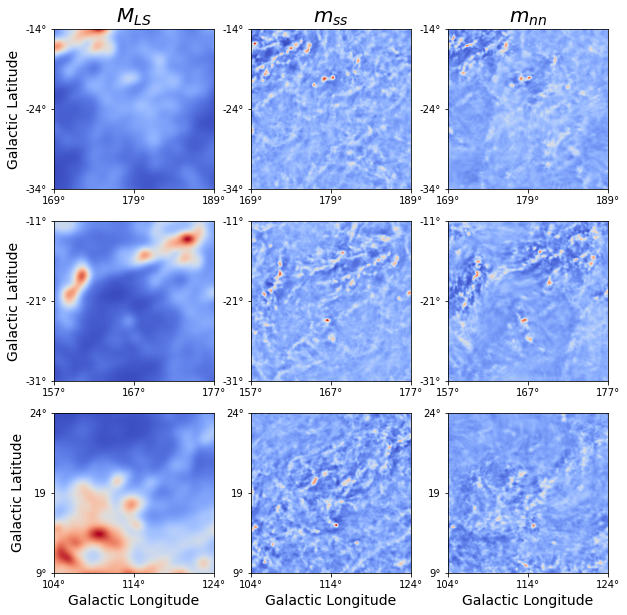

In [21]:
plt.figure(figsize=(10, 10))

plt.subplot(331)
plt.imshow(Ls_scaled[12,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$M_{LS}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(332)
plt.imshow(Ss_ratio_scaled[12,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$m_{ss}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(333)
plt.imshow(NNout[12,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$m_{nn}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(334)
plt.imshow(Ls_scaled[238,:, :,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )
plt.ylabel('Galactic Latitude', fontsize=14)


plt.subplot(335)
plt.imshow(Ss_ratio_scaled[238,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(336)
plt.imshow(NNout[238,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(337)
plt.imshow(Ls_scaled[76,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(338)
plt.imshow(Ss_ratio_scaled[76,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )

plt.subplot(339)
plt.imshow(NNout[76,:,:,0], vmin=-1, vmax=1, cmap='coolwarm')
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )
plt.savefig('T_patches_IO.pdf')


#### rescale small scales to physical units
to rescale to physical units we use the information on mean and standard deviation from the real high resolution maps

In [22]:
Ss_ratio_edges = np.array(Ss_ratio_edges)
NNout_normed = np.copy(NNout)
for i in range(npatches):
    NNout_normed[i] = (NNout_normed[i]/np.std(NNout_normed[i])*np.std(Ss_ratio[i]))
    NNout_normed[i] = (NNout_normed[i]-np.mean(NNout_normed[i])+np.mean(Ss_ratio[i]))

#### plot final images
figure 5 in ForSE paper

([<matplotlib.axis.XTick at 0x2aab7bd6a750>,
 <a list of 3 Text xticklabel objects>)

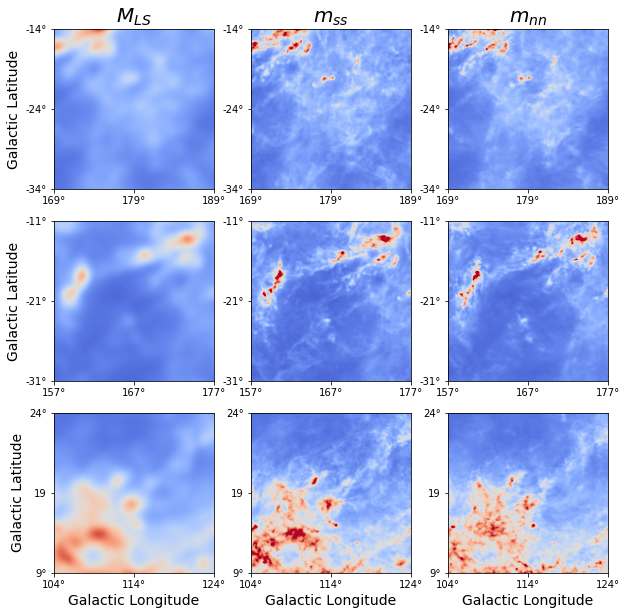

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(331)
cf = 1e3
expl = 12
vmax = 20
plt.imshow(Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.title(r'$M_{LS}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(332)
plt.imshow(Ss_ratio[expl,:,:]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.title(r'$m_{ss}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(333)
plt.imshow(NNout_normed[expl,:,:,0]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.title(r'$m_{nn}$', fontsize=20)
plt.yticks((0, 160, 320), ('-14°', '-24°', '-34°') )
plt.xticks((0, 160, 320), ('169°', '179°', '189°') )

plt.subplot(334)
expl =238
vmax = 25
plt.imshow(Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(335)
plt.imshow(Ss_ratio[expl,:,:]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(336)
plt.imshow(NNout_normed[expl,:,:,0]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.yticks((0, 160, 320), ('-11°', '-21°', '-31°') )
plt.xticks((0, 160, 320), ('157°', '167°', '177°') )

plt.subplot(337)
expl = 76
vmax = 12
plt.imshow(Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )
plt.ylabel('Galactic Latitude', fontsize=14)

plt.subplot(338)
plt.imshow(Ss_ratio[expl,:,:]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )

plt.subplot(339)
plt.imshow(NNout_normed[expl,:,:,0]*Ls[expl,:,:]*cf, cmap='coolwarm', vmin=0, vmax=vmax)
plt.xlabel('Galactic Longitude', fontsize=14)
plt.yticks((0, 160, 320), ('24°', '19', '9°') )
plt.xticks((0, 160, 320), ('104°', '114°', '124°') )

#### compute and plot minkowski functionals 
figure 4 in ForSE paper

In [24]:
rhos_gnilc, f_gnilc, u_gnilc, chi_gnilc = [], [], [], []    
rhos_nn, f_nn, u_nn, chi_nn = [], [], [], []  
for i in range(npatches):
    mgnilc = rescale_min_max(Ss_ratio[i], return_min_max=False)
    rhos_T, f_T, u_T, chi_T = get_functionals(mgnilc)
    mNN = rescale_min_max(NNout[i, :, :, 0], return_min_max=False)
    rhos_NN, f_NN, u_NN, chi_NN= get_functionals(mNN)
    f_gnilc.append(f_T)
    f_nn.append(f_NN)
    u_gnilc.append(u_T)
    u_nn.append(u_NN)
    chi_gnilc.append(chi_T)
    chi_nn.append(chi_NN)

Text(0, 0.5, '$\\mathcal{V}_2(\\rho$)')

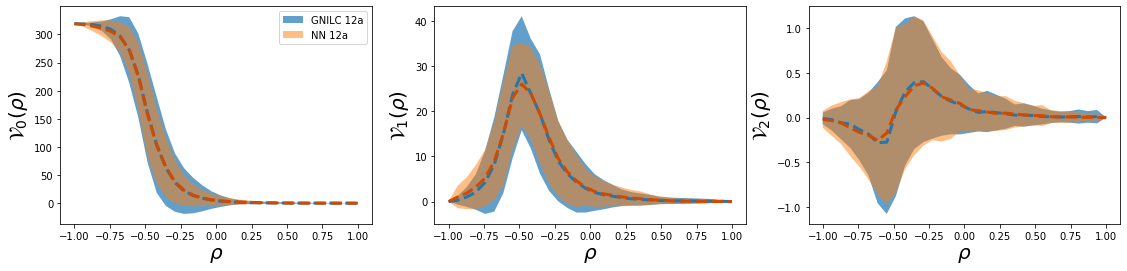

In [25]:
f_gnilc = np.array(f_gnilc)
f_nn = np.array(f_nn)
u_gnilc = np.array(u_gnilc)
u_nn = np.array(u_nn)
chi_gnilc = np.array(chi_gnilc)
chi_nn = np.array(chi_nn)

plt.figure(figsize=(19, 4))

plt.subplot(131)
plt.ylabel(r'$\mathcal{V}_0(\rho$)', fontsize=20)
plt.fill_between(rhos_T, 
                     np.mean(f_gnilc, axis=0)-np.std(f_gnilc, axis=0), 
                     np.mean(f_gnilc, axis=0)+np.std(f_gnilc, axis=0), 
                     lw=1, label='GNILC 12a', alpha=0.7)
plt.plot(rhos_T, np.mean(f_gnilc, axis=0), lw=3, ls='--')
plt.fill_between(rhos_T, 
                     np.mean(f_nn, axis=0)-np.std(f_nn, axis=0), 
                     np.mean(f_nn, axis=0)+np.std(f_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5)
plt.plot(rhos_T, np.mean(f_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.legend()
plt.xlabel(r'$\rho$', fontsize=20)

plt.subplot(132)
plt.ylabel(r'$\mathcal{V}_1(\rho$)', fontsize=20)
plt.fill_between(rhos_T, 
                     np.mean(u_gnilc, axis=0)-np.std(u_gnilc, axis=0), 
                     np.mean(u_gnilc, axis=0)+np.std(u_gnilc, axis=0), 
                     lw=1, label='GNILC 12a', alpha=0.7)
plt.plot(rhos_T, np.mean(u_gnilc, axis=0), lw=3, ls='--')
plt.fill_between(rhos_T, 
                     np.mean(u_nn, axis=0)-np.std(u_nn, axis=0), 
                     np.mean(u_nn, axis=0)+np.std(u_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5)
plt.plot(rhos_T, np.mean(u_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.xlabel(r'$\rho$', fontsize=20)

plt.subplot(133)
plt.fill_between(rhos_T, 
                     np.mean(chi_gnilc, axis=0)-np.std(chi_gnilc, axis=0), 
                     np.mean(chi_gnilc, axis=0)+np.std(chi_gnilc, axis=0), 
                     lw=1, label='GNILC 12a', alpha=0.7)
plt.plot(rhos_T, np.mean(chi_gnilc, axis=0), lw=3, ls='--')
plt.fill_between(rhos_T, 
                     np.mean(chi_nn, axis=0)-np.std(chi_nn, axis=0), 
                     np.mean(chi_nn, axis=0)+np.std(chi_nn, axis=0), 
                     lw=1, label='NN 12a', alpha=0.5)
plt.plot(rhos_T, np.mean(chi_nn, axis=0), lw=3, ls='--', color='#D04A00')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$\mathcal{V}_2(\rho$)', fontsize=20)


#### compute superposition of functionals

In [26]:
m1 = compute_intersection(rhos_T, 
                     [np.mean(f_gnilc, axis=0)-np.std(f_gnilc, axis=0), np.mean(f_gnilc, axis=0)+np.std(f_gnilc, axis=0)], 
                     [np.mean(f_nn, axis=0)-np.std(f_nn, axis=0),np.mean(f_nn, axis=0)+np.std(f_nn, axis=0)], 
                     npt=100000)
m2 = compute_intersection(rhos_T, 
                     [np.mean(u_gnilc, axis=0)-np.std(u_gnilc, axis=0), np.mean(u_gnilc, axis=0)+np.std(u_gnilc, axis=0)], 
                     [np.mean(u_nn, axis=0)-np.std(u_nn, axis=0),np.mean(u_nn, axis=0)+np.std(u_nn, axis=0)], 
                     npt=100000)
m3 = compute_intersection(rhos_T, 
                     [np.mean(chi_gnilc, axis=0)-np.std(chi_gnilc, axis=0), np.mean(chi_gnilc, axis=0)+np.std(chi_gnilc, axis=0)], 
                     [np.mean(chi_nn, axis=0)-np.std(chi_nn, axis=0),np.mean(chi_nn, axis=0)+np.std(chi_nn, axis=0)], 
                     npt=100000)

In [27]:
m1, m2, m3

(0.7585417064325253, 0.8373434572527364, 0.9066493541994123)

#### compute power spectra with NaMaster
https://namaster.readthedocs.io/en/latest/

In [28]:
expl = 12
LS = Ls[expl,:,:]*cf
SS = Ss_ratio[expl,:,:]*Ls[expl,:,:]*cf
NN = NNout_normed[expl,:,:,0]*Ls[expl,:,:]*cf

In [24]:
import pymaster as nmt

In [25]:
Lx = np.radians(20.)
Ly = np.radians(20.)
Nx = 320
Ny = 320

In [26]:
mask = np.ones_like(LS).flatten()
xarr = np.ones(Ny)[:, None] * np.arange(Nx)[None, :] * Lx/Nx
yarr = np.ones(Nx)[None, :] * np.arange(Ny)[:, None] * Ly/Ny
mask[np.where(xarr.flatten() < Lx / 100.)] = 0
mask[np.where(xarr.flatten() > 99 * Lx / 100.)] = 0
mask[np.where(yarr.flatten() < Ly / 100.)] = 0
mask[np.where(yarr.flatten() > 99 * Ly / 100.)] = 0
mask = mask.reshape([Ny, Nx])
mask = nmt.mask_apodization_flat(mask, Lx, Ly, aposize=2., apotype="C1")

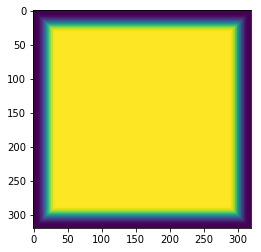

In [27]:
plt.imshow(mask)

In [28]:
l0_bins = np.arange(20, 1000, 40)
lf_bins = np.arange(20, 1000, 40)+39
b = nmt.NmtBinFlat(l0_bins, lf_bins)
ells_uncoupled = b.get_effective_ells()

In [29]:
f_LS = nmt.NmtFieldFlat(Lx, Ly, mask, [LS])
w00 = nmt.NmtWorkspaceFlat()
w00.compute_coupling_matrix(f_LS, f_LS, b)
cl_LS_coupled = nmt.compute_coupled_cell_flat(f_LS, f_LS, b)
cl_LS_uncoupled = w00_LS.decouple_cell(cl_LS_coupled)

In [30]:
f_SS = nmt.NmtFieldFlat(Lx, Ly, mask, [SS])
cl_SS_coupled = nmt.compute_coupled_cell_flat(f_SS, f_SS, b)
cl_SS_uncoupled = w00.decouple_cell(cl_SS_coupled)

In [31]:
f_NN = nmt.NmtFieldFlat(Lx, Ly, mask, [NN])
cl_NN_coupled = nmt.compute_coupled_cell_flat(f_NN, f_NN, b)
cl_NN_uncoupled = w00.decouple_cell(cl_NN_coupled)

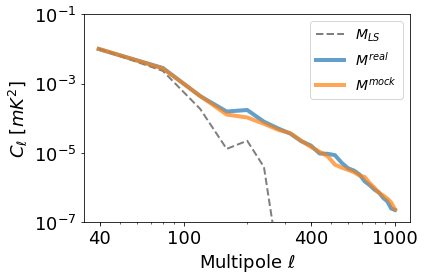

In [32]:
plt.loglog(ells_uncoupled, cl_LS_uncoupled[0],  '--',label='$M_{LS}$', lw=2, color='Black', alpha=0.5)
Dlf  =  ells_uncoupled*(ells_uncoupled+1)/2./np.pi
plt.semilogy(ells_uncoupled, cl_SS_uncoupled[0], '-', label='$M^{real}$', lw=4, alpha=0.7)
plt.loglog(ells_uncoupled, cl_NN_uncoupled[0], '-', label='$M^{mock}$', lw=4, alpha=0.7)
plt.xlabel(r'Multipole $\ell$', fontsize=18)
plt.ylabel(r'$C_\ell$ [$m K^2$]', fontsize=18)
plt.ylim(1e-7, 1e-1)
plt.legend(fontsize=14)
plt.xticks([40, 100, 400, 1000], [40, 100, 400, 1000])
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()